# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(95, 95)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |               22070 |
+---------------------+---------------------+
|            取引回数 |                  95 |
+---------------------+---------------------+
|            開始日時 | 2020-03-25 03:54:00 |
+---------------------+---------------------+
|            終了日時 | 2020-03-25 10:16:22 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 06:22:22 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.006 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+-----------+
| 開始[JPY]   |     11776 |
+-------------+-----------+
| 終了[JPY]   |     11788 |
+-------------+-----------+
| 利益[JPY]   |        12 |
+-------------+-----------+
| 開始[BTC]   |  0.021338 |
+-------------+----------

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-03-25 09:00:32,buy,4503.995,sell,4499.712,-4.283
2020-03-25 09:01:14,sell,4488.348,buy,4485.648,2.700
2020-03-25 09:01:17,buy,4482.997,sell,4479.408,-3.589
2020-03-25 09:01:25,sell,4476.000,buy,4472.148,3.852
2020-03-25 09:01:28,buy,4471.998,sell,4460.406,-11.592
2020-03-25 09:01:31,sell,4465.986,buy,4462.524,3.462
2020-03-25 09:01:48,buy,4474.994,sell,4476.612,1.618
2020-03-25 09:01:53,buy,4474.996,sell,4473.102,-1.894
2020-03-25 09:02:16,sell,4482.366,buy,4483.080,-0.714


In [12]:
round(sum(profit_df.profit), 3)

5.197

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(22070, 22070)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1, 'exchange2 bid/exchange1 ask')

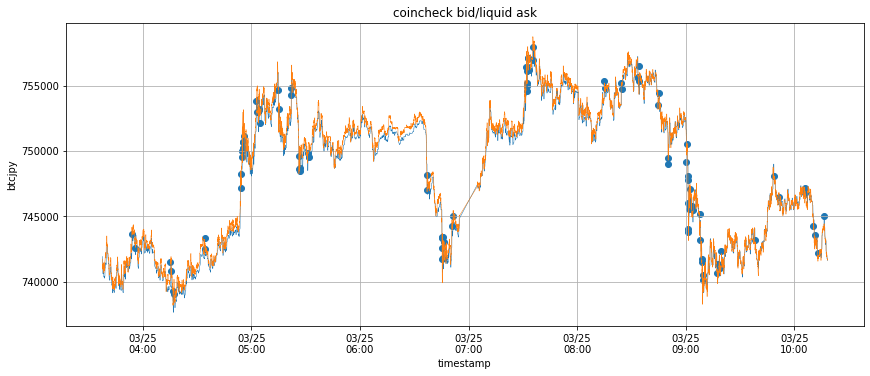

In [16]:
fig1

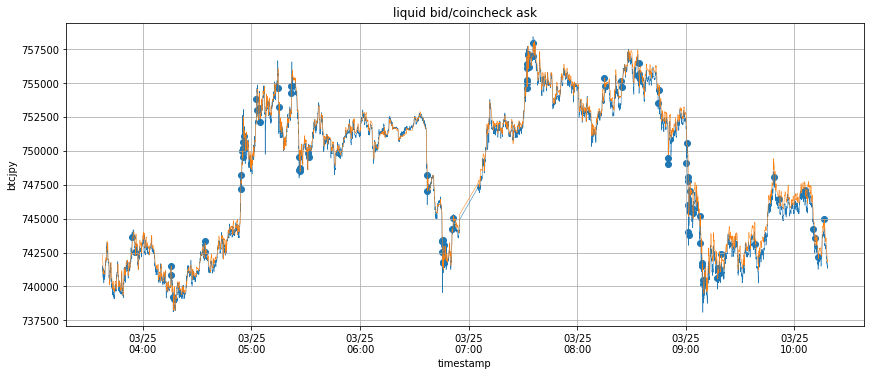

In [17]:
fig2